In [1]:
import os
from PIL import Image

def resize_images(image_directory, output_directory, size=(512,512)):
    # Lista todos os arquivos no diretório
    files = os.listdir(image_directory)
    
    # Filtra apenas os arquivos de imagem
    images = [i for i in files if i.endswith(('.jpg', '.png', '.jpeg'))]

    # Cria o diretório de saída se não existir
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Loop sobre todas as imagens
    for image in images:
        # Abre a imagem
        img = Image.open(os.path.join(image_directory, image))
        # Redimensiona a imagem
        img_resized = img.resize(size)
        # Salva a imagem redimensionada no diretório de saída
        img_resized.save(os.path.join(output_directory, image))

    print(f"Imagens redimensionadas salvas em: {output_directory}")

# Chama a função nos dois diretórios
resize_images("C:/Users/T-GAMER/Downloads/teste/images", "C:/Users/T-GAMER/Downloads/teste/pp/images")
resize_images("C:/Users/T-GAMER/Downloads/teste/masks", "C:/Users/T-GAMER/Downloads/teste/pp/masks")


Imagens redimensionadas salvas em: C:/Users/T-GAMER/Downloads/teste/pp/images
Imagens redimensionadas salvas em: C:/Users/T-GAMER/Downloads/teste/pp/masks


In [2]:
import cv2, re
import numpy as np
import os
# from PIL import Image
# import os
import glob
# from pathlib import Path

# # Caminho da pasta contendo as imagens de entrada
# input_folder = "C:/Users/T-GAMER/Downloads/teste/pp/masks"

# # Caminho da pasta para salvar as imagens destacadas
# output_folder = "C:/Users/T-GAMER/Downloads/teste/pp/newmask"

# # Verificar se o caminho de saída existe, caso contrário, criar a pasta
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Lista todos os arquivos na pasta de entrada
# image_files = os.listdir(input_folder)

# # Loop através de cada arquivo de imagem
# for image_file in image_files:
#     # Caminho completo para a imagem de entrada
#     input_path = os.path.join(input_folder, image_file)

#     # Carregar a imagem
#     image = cv2.imread(input_path)

#     # Verificar se a imagem foi carregada corretamente
#     if image is None:
#         print("Não foi possível carregar a imagem:", input_path)
#         continue

#     # Converter a imagem para o espaço de cores HSV
#     image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     # Definir os intervalos de cor para vermelho e preto
#     lower_red = np.array([0, 50, 50])   # Faixa inferior de vermelho no espaço HSV
#     upper_red = np.array([10, 255, 255])  # Faixa superior de vermelho no espaço HSV
#     lower_black = np.array([0, 0, 0])    # Faixa inferior de preto no espaço HSV
#     upper_black = np.array([180, 255, 40])  # Faixa superior de preto no espaço HSV

#     # Criar as máscaras para vermelho e preto
#     mask_red = cv2.inRange(image_hsv, lower_red, upper_red)
#     mask_black = cv2.inRange(image_hsv, lower_black, upper_black)

#     # Criar uma máscara para preservar o background branco
#     mask_white = cv2.inRange(image, (255, 255, 255), (255, 255, 255))

#     # Combinar as máscaras
#     combined_mask = cv2.bitwise_or(mask_red, mask_black)
#     combined_mask = cv2.bitwise_or(combined_mask, mask_white)

#     # Aplicar a máscara para obter a imagem destacando vermelho e preto
#     result = cv2.bitwise_and(image, image, mask=combined_mask)

#     # Caminho completo para a imagem de saída
#     output_path = os.path.join(output_folder, image_file)

#     # Salvar a imagem resultante
#     cv2.imwrite(output_path, result)

# print("Processamento concluído.")


In [3]:
import glob
import os
from PIL import Image, ImageEnhance
import re

# Define the list of transformations
transformations = {
    "original": lambda x: x,
    "halfSize": lambda x: x.resize((int(x.size[0]/2), int(x.size[1]/2))),
    "rotate180": lambda x: x.rotate(180),
    "flipHorizontal": lambda x: x.transpose(Image.FLIP_LEFT_RIGHT),
    "rotate90": lambda x: x.rotate(90),
    "flipVertical": lambda x: x.transpose(Image.FLIP_TOP_BOTTOM),
    "rotate45": lambda x: x.rotate(45),
    "brightness": lambda x: ImageEnhance.Brightness(x).enhance(1.5),
    "contrast": lambda x: ImageEnhance.Contrast(x).enhance(1.5),
}

def augment_images(images, masks, output_folder_images, output_folder_masks):
    # Ensure the output directories exist
    os.makedirs(output_folder_images, exist_ok=True)
    os.makedirs(output_folder_masks, exist_ok=True)

    # Iterate over each image and mask
    for img, mask in zip(images, masks):
        # Extract the base name of the image to use for output files
        basename = os.path.basename(img.filename)
        basename = re.sub(r'\.(png|jpg)$', '', basename)

        # Iterate over each transformation
        for name, transform in transformations.items():
            # Apply the transformation to the image and the mask
            img_transformed = transform(img)
            mask_transformed = transform(mask)

            # Save the transformed image and mask in separate directories
            img_transformed.save(os.path.join(output_folder_images, f"{basename}-{name}.png"))
            mask_transformed.save(os.path.join(output_folder_masks, f"{basename}-{name}.png"))


# Chama a função
# Define a função para ler as imagens
def load_images_masks(folder):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.png')):  # assumindo png
        img = Image.open(filename)
        images.append(img)
    return images

# Defina o diretório onde suas imagens e máscaras estão localizadas
images_folder = "C:/Users/T-GAMER/Downloads/teste/pp/images/"
masks_folder = "C:/Users/T-GAMER/Downloads/teste/pp/masks/"

# Carregue as imagens e máscaras em listas de objetos Image
images = load_images_masks(images_folder)
masks = load_images_masks(masks_folder)

# Agora chame a função
augment_images(images, masks, "C:/Users/T-GAMER/Downloads/teste/pp/augmented/images/", "C:/Users/T-GAMER/Downloads/teste/pp/augmented/masks/")


In [4]:
len(images)

12

In [5]:
from PIL import Image
import os
import glob
from pathlib import Path

def crop_images(directory, size=(64, 64)):
    """Crops all images in a directory into pieces of a specified size."""
    output_dir = os.path.join(directory, "cropped")
    os.makedirs(output_dir, exist_ok=True)  # create the directory if it doesn't exist

    for filepath in glob.glob(os.path.join(directory, "*.png")):
        img = Image.open(filepath)
        img_basename = Path(filepath).stem  # get the base name of the image file

        width, height = img.size

        # iterate over the image in size-sized chunks
        for i in range(0, width, size[0]):
            for j in range(0, height, size[1]):
                # only proceed if the chunk is the correct size
                if i + size[0] <= width and j + size[1] <= height:
                    # crop the chunk
                    img_cropped = img.crop((i, j, i + size[0], j + size[1]))

                    # save the cropped chunk
                    filename_cropped = f"{img_basename}_{i}_{j}.png"
                    output_filepath = os.path.join(output_dir, filename_cropped)
                    img_cropped.save(output_filepath)

def crop_masks(directory, size=(64, 64)):
    """Crops all masks in a directory into pieces of a specified size."""
    output_dir = os.path.join(directory, "cropped")
    os.makedirs(output_dir, exist_ok=True)  # create the directory if it doesn't exist

    for filepath in glob.glob(os.path.join(directory, "*.png")):
        img = Image.open(filepath)
        img_basename = Path(filepath).stem  # get the base name of the mask file

        width, height = img.size

        # iterate over the image in size-sized chunks
        for i in range(0, width, size[0]):
            for j in range(0, height, size[1]):
                # only proceed if the chunk is the correct size
                if i + size[0] <= width and j + size[1] <= height:
                    # crop the chunk
                    img_cropped = img.crop((i, j, i + size[0], j + size[1]))

                    # save the cropped chunk
                    filename_cropped = f"{img_basename}_{i}_{j}.png"
                    output_filepath = os.path.join(output_dir, filename_cropped)
                    img_cropped.save(output_filepath)

crop_images("C:/Users/T-GAMER/Downloads/teste/pp/augmented/images/")
crop_masks("C:/Users/T-GAMER/Downloads/teste/pp/augmented/masks/")


In [6]:
import os
import cv2
import numpy as np

def check_and_save(input_dir, mask_dir, new_input_dir, new_mask_dir):
    # Cria novos diretórios se ainda não existirem
    if not os.path.exists(new_input_dir):
        os.makedirs(new_input_dir)
    if not os.path.exists(new_mask_dir):
        os.makedirs(new_mask_dir)

    # Itera sobre todas as imagens no diretório de máscara
    for filename in os.listdir(mask_dir):
        # Abre a imagem da máscara
        mask = cv2.imread(os.path.join(mask_dir, filename))

        # Verifica se há algum pixel preto ou vermelho
        # Nota: OpenCV lê imagens no formato BGR, não RGB
        if np.any(np.all(mask == [0, 0, 0], axis=2)) or np.any(np.all(mask == [0, 0, 255], axis=2)):
            # Se sim, salva a imagem de entrada correspondente e a máscara em novos diretórios
            input_img = cv2.imread(os.path.join(input_dir, filename))
            cv2.imwrite(os.path.join(new_input_dir, filename), input_img)
            cv2.imwrite(os.path.join(new_mask_dir, filename), mask)

# Exemplo de uso
input_dir = "C:/Users/T-GAMER/Downloads/teste/pp/augmented/images/cropped/"
mask_dir = "C:/Users/T-GAMER/Downloads/teste/pp/augmented/masks/cropped/"
new_input_dir = "C:/Users/T-GAMER/Downloads/teste/pp/augmented/images/new/"
new_mask_dir = "C:/Users/T-GAMER/Downloads/teste/pp/augmented/masks/new/"

check_and_save(input_dir, mask_dir, new_input_dir, new_mask_dir)


In [195]:
from PIL import Image
import os
import glob
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np


from natsort import natsorted

def load_images(directory, size=(64, 64)):
    """Load images and corresponding masks from a directory, sorted by filename."""
    images_x = []
    images_y = []
    filenames = natsorted(glob.glob(directory + "*.png"))  # assuming png files
    for filename in filenames:
            img = load_img(filename, target_size=size)  # this is a PIL image
            img = img_to_array(img)  # this is a Numpy array with shape (128, 128, 3)
            images_x.append(img)
    return np.array(images_x)



# Load the images and masks
X = load_images("C:/Users/T-GAMER/Downloads/teste/pp/augmented/images/new/")
y = load_images("C:/Users/T-GAMER/Downloads/teste/pp/augmented/masks/new/")

In [196]:
X.shape

(3348, 64, 64, 3)

In [197]:
y.shape

(3348, 64, 64, 3)

In [198]:
# Normalize the images and masks
X = X / 255
y = y / 255

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [200]:
# import matplotlib.pyplot as plt

# # Definir a função para plotar as imagens
# def plot_images(images, masks, indices):
#     num_samples = len(indices)
#     fig, axes = plt.subplots(nrows=num_samples, ncols=2, figsize=(10, 10))
#     for i, index in enumerate(indices):
#         axes[i, 0].imshow(images[index])
#         axes[i, 0].axis('off')
#         axes[i, 0].set_title('Imagem')
#         axes[i, 1].imshow(masks[index])
#         axes[i, 1].axis('off')
#         axes[i, 1].set_title('Máscara')
#     plt.tight_layout()
#     plt.show()
# indices = [22, 25, 28]
# plot_images(X_train, y_train, indices)


In [201]:
red = np.array([1, 0, 0])
black = np.array([0, 0, 0])
white = np.array([1, 1, 1])


In [202]:
def label_images(images):
    # Define as cores das classes
    red = np.array([1, 0, 0])
    black = np.array([0, 0, 0])
    white = np.array([1, 1, 1])

    # Crie um array vazio para armazenar as labels das imagens
    labels = np.empty((images.shape[0], images.shape[1], images.shape[2]), dtype=np.uint8)

    for i in range(len(images)):
        # Redimensiona a imagem para o formato (num_pixels, num_channels)
        pixels = images[i].reshape(-1, 3)

        # Calcula a distância euclidiana de cada pixel para cada cor de classe
        dist_to_red = np.linalg.norm(pixels - red, axis=1)
        dist_to_black = np.linalg.norm(pixels - black, axis=1)
        dist_to_white = np.linalg.norm(pixels - white, axis=1)

        # Atribui a classe de cor que tem a menor distância para cada pixel
        labels[i] = np.argmin(np.array([dist_to_red, dist_to_black, dist_to_white]), axis=0).reshape(images[i].shape[:2])

    return labels

# Aplique a função para y_train e y_test
y_train_labels = label_images(y_train)
y_test_labels = label_images(y_test)


In [203]:
y_train_labels.shape, X_train.shape

((2678, 64, 64), (2678, 64, 64, 3))

In [204]:
# # Imprimir a imagem
# plt.imshow(X_train[4])
# plt.axis('off')
# plt.show()

In [205]:
# # Imprimir a imagem
# plt.imshow(y_train_labels[4])
# plt.axis('off')
# plt.show()

In [206]:
# import matplotlib.pyplot as plt

# # Suponha que você tenha as matrizes X_test e y_test_labels corretamente carregadas

# num_samples = 10  # número de amostras que você deseja verificar

# # Verificar as primeiras 'num_samples' amostras
# for i in range(num_samples):
#     # Selecionar a i-ésima imagem e sua máscara correspondente
#     imagem = X_train[i]
#     mascara = y_train[i]

#     # Plotar a imagem e a máscara
#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.imshow(imagem)
#     plt.title('Imagem')
#     plt.axis('off')
#     plt.subplot(1, 2, 2)
#     plt.imshow(mascara, cmap='gray')  # assumindo que a máscara é em preto e branco
#     plt.title('Máscara')
#     plt.axis('off')
#     plt.show()


In [207]:
from keras.utils import to_categorical

y_train_labels = to_categorical(y_train_labels, 3)

In [208]:
y_test_labels = to_categorical(y_test_labels, 3)

In [209]:
y_train_labels.shape, y_test_labels.shape

((2678, 64, 64, 3), (670, 64, 64, 3))

In [210]:
X_train.shape, X_test.shape

((2678, 64, 64, 3), (670, 64, 64, 3))

In [211]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
def multi_unet_model(n_classes=3, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

In [212]:
from tensorflow.keras.optimizers import Adam
model = multi_unet_model(n_classes=3, IMG_HEIGHT=64, IMG_WIDTH=64, IMG_CHANNELS=3)
model.compile(optimizer=Adam(learning_rate =0.005), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [213]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydotplus

tf.keras.utils.pydot = pydotplus

# Supondo que o seu modelo se chama 'modelo_segmentacao'
plot_model(model, to_file='modelo_segmentacao.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss', verbose=1, save_best_only=True)

# history = model.fit(X_train, y_train_labels, 
#                     batch_size=32, 
#                     epochs=40, 
#                     verbose=1, 
#                     validation_data=(X_test, y_test_labels), 
#                     shuffle=False, 
#                     steps_per_epoch=len(X_train) // 32,
#                     callbacks=[model_checkpoint])
import time

# Grava o tempo de início
start_time = time.time()

# Insira o seu código de treinamento aqui
history = model.fit(X_train, y_train_labels, 
                    batch_size=32, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_test, y_test_labels), 
                    shuffle=False, 
                    steps_per_epoch=len(X_train) // 32,
                    callbacks=[model_checkpoint])

# Grava o tempo de fim
end_time = time.time()

# Calcula e imprime a diferença
total_time = end_time - start_time
print("Tempo total de treinamento: {:.2f} segundos".format(total_time))


In [27]:
# model.save('testnovo.hdf5')


In [143]:
model.load_weights('C:/Users/T-GAMER/Downloads/teste/testnovo.hdf5')  


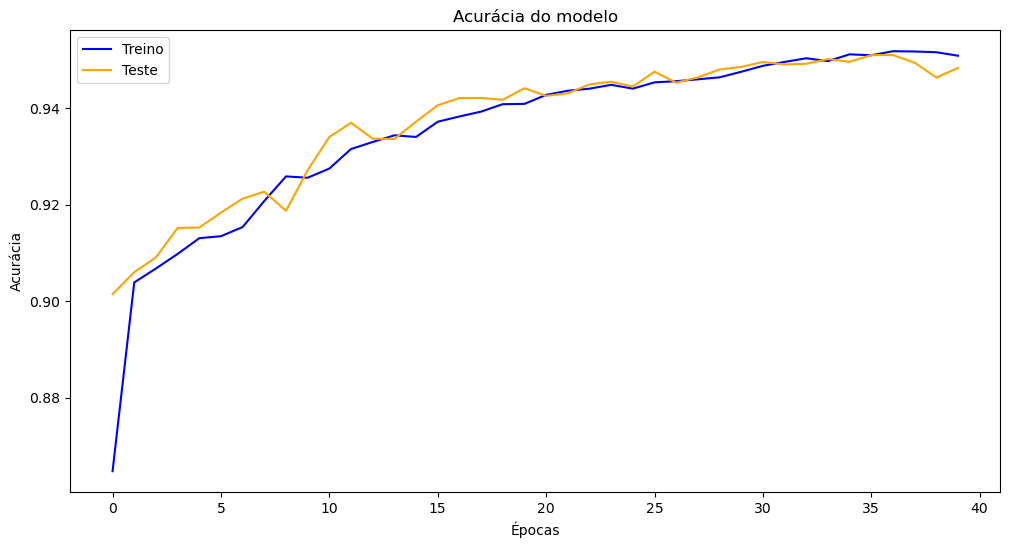

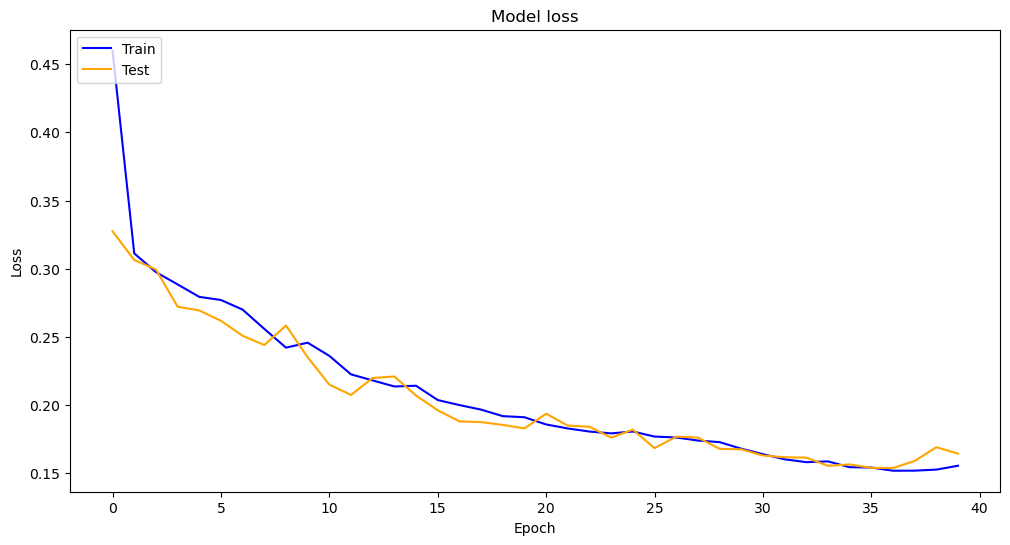

In [144]:
# Plotando as métricas
import matplotlib.pyplot as plt


# Plotando a acurácia
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

# Plotando a perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [214]:
model.load_weights('C:/Users/T-GAMER/Downloads/teste/unet.hdf5')  


In [215]:
# Fazendo predição no conjunto de teste

preds_test = model.predict(X_test, verbose=1)

21/21 [==============================] - 2s 72ms/step


In [216]:
_, acc = model.evaluate(X_test, y_test_labels)
print("Accuracy is = ", (acc * 100.0), "%")

21/21 [==============================] - 2s 72ms/step - loss: 0.1537 - accuracy: 0.9510
Accuracy is =  95.10093331336975 %


In [217]:
loss, acc = model.evaluate(X_test, y_test_labels, verbose=0)
print("Acurácia: {:.2f}%".format(acc * 100))


Acurácia: 95.10%


In [33]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# plt.plot(100, acc, 'y', label='Training Accuracy')
# plt.plot(100, val_acc, 'r', label='Validation Accuracy')
# plt.title('Training and validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

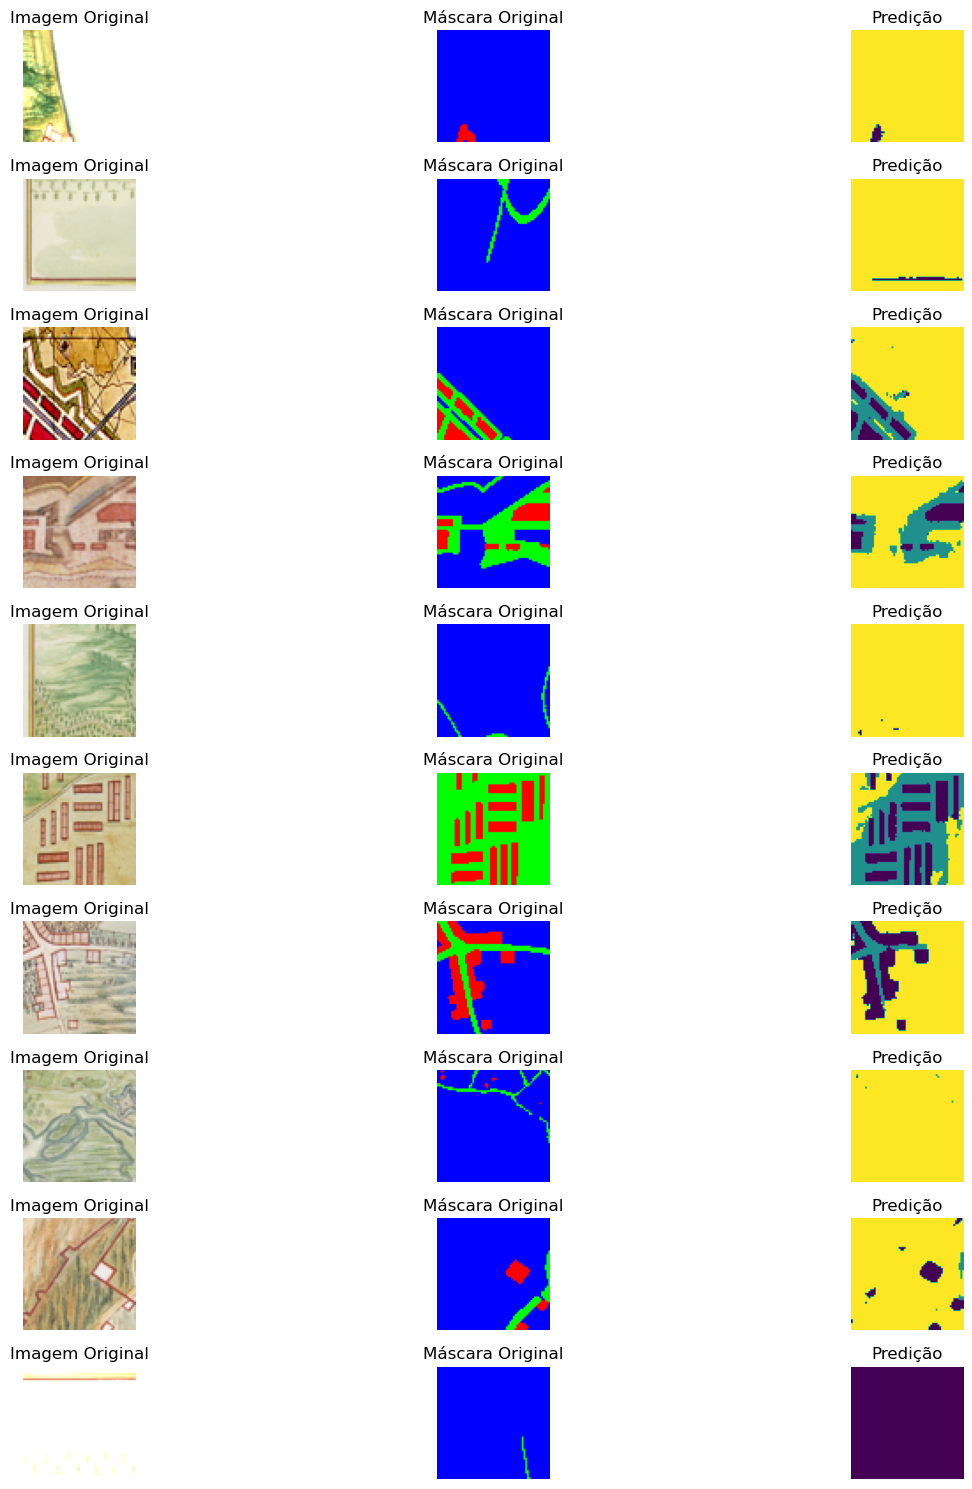

In [218]:
# Plotando as imagens, as máscaras e as predições lado a lado

n = 10  # Número de exemplos que você quer plotar
fig, ax = plt.subplots(n, 3, figsize=(15, 15))

for i in range(n):
    # Imagem Original
    ax[i, 0].imshow(X_test[i])
    ax[i, 0].axis('off')
    ax[i, 0].set_title("Imagem Original")

    # Máscara Original
    ax[i, 1].imshow(y_test_labels[i])
    ax[i, 1].axis('off')
    ax[i, 1].set_title("Máscara Original")

    # Predição
    ax[i, 2].imshow(preds_test[i].argmax(axis=-1))  # Mostra a classe com maior probabilidade
    ax[i, 2].axis('off')
    ax[i, 2].set_title("Predição")

plt.tight_layout()
plt.show()


In [219]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

21/21 [==============================] - 2s 73ms/step


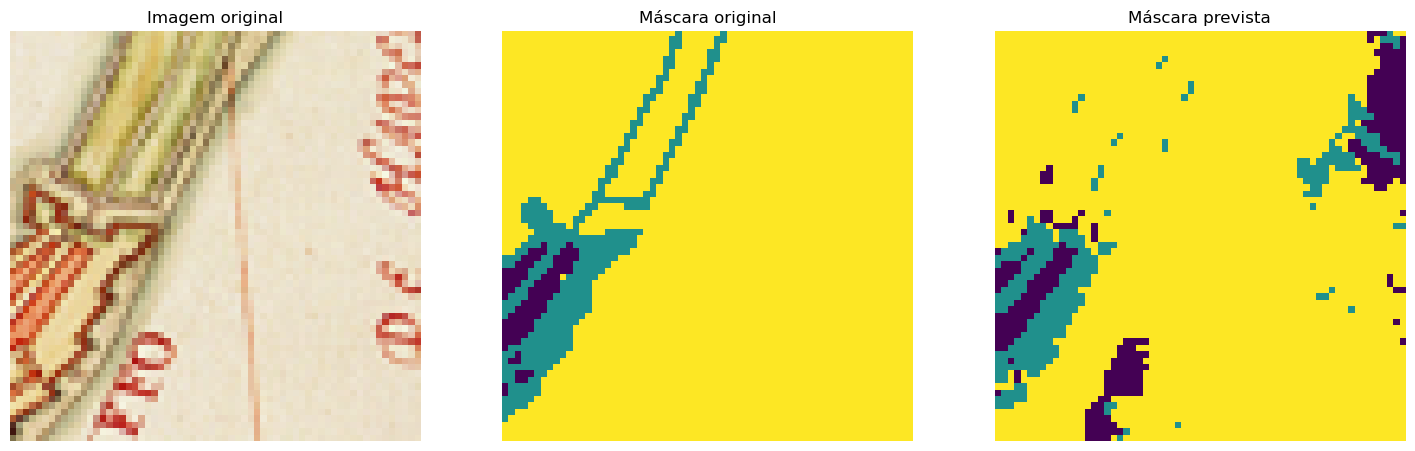

In [220]:
test_p = np.argmax(y_test_labels, axis=3)
plt.figure(figsize=(18, 6))

n = 11
# Subplot 1: Imagem original
plt.subplot(1, 3, 1)
plt.title('Imagem original')
plt.imshow(X_test[n])
plt.axis('off')
          
# Subplot 2: Máscara original
plt.subplot(1, 3, 2)
plt.title('Máscara original')
plt.imshow(test_p[n])
plt.axis('off')
           
# Subplot 3: Máscara prevista
plt.subplot(1, 3, 3)
plt.title('Máscara prevista')
plt.imshow(y_pred_argmax[n])
plt.axis('off')

plt.show()



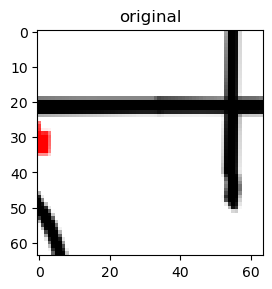

In [221]:
# Subplot 2: Máscara original
plt.subplot(1, 2, 2)
plt.title('original')
plt.imshow(X_test[10])

plt.title('original')
plt.imshow(y_test[10])

plt.show()



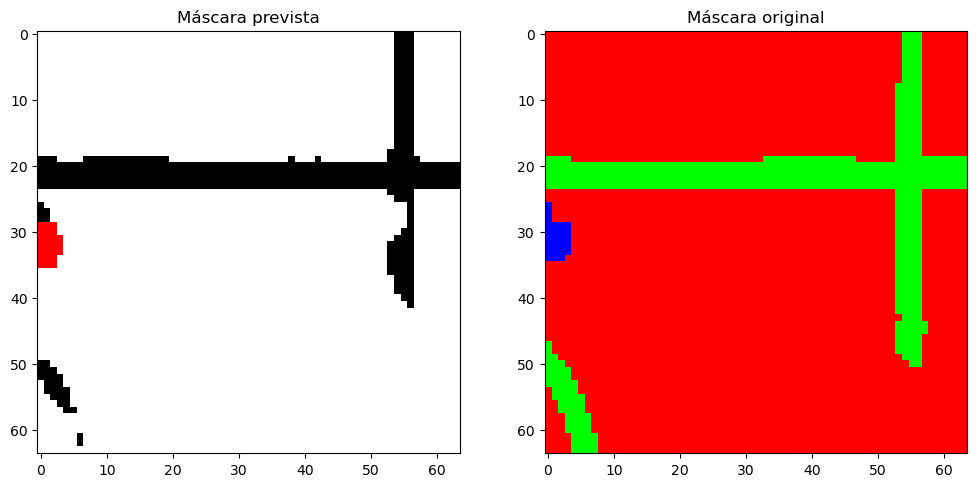

In [222]:
import cv2

def plot_images(predicted_mask, original_mask):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))

    # Convertendo de classificações de canais únicos para imagens RGB
    predicted_mask_rgb = np.zeros((predicted_mask.shape[0], predicted_mask.shape[1], 3))
    for i in range(predicted_mask.shape[0]):
        for j in range(predicted_mask.shape[1]):
            if predicted_mask[i, j] == 0:
                predicted_mask_rgb[i, j] = [255, 0, 0] # Vermelho para a classe 0
            elif predicted_mask[i, j] == 1:
                predicted_mask_rgb[i, j] = [0, 0, 0] # Preto para a classe 1
            elif predicted_mask[i, j] == 2:
                predicted_mask_rgb[i, j] = [255, 255, 255] # Branco para a classe 2

    # Convertendo a máscara original de BGR para RGB
    original_mask_rgb = cv2.cvtColor(original_mask, cv2.COLOR_BGR2RGB)

    # Plotando a máscara prevista
    ax[0].imshow(predicted_mask_rgb.astype(np.uint8))
    ax[0].set_title('Máscara prevista')

    # Plotando a máscara original
    ax[1].imshow(original_mask_rgb)
    ax[1].set_title('Máscara original')

    # Exibindo as imagens
    plt.show()

# Seleciona a imagem de índice 10 para exibir
plot_images(y_pred_argmax[10], y_test_labels[10])


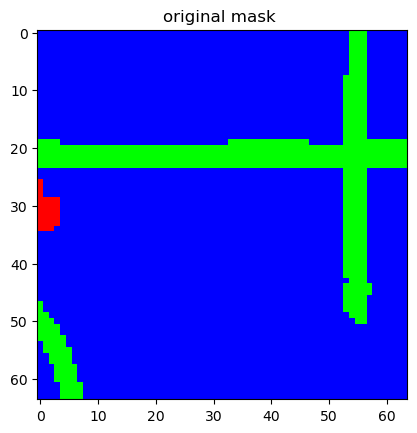

In [182]:
plt.title('original mask ')
plt.imshow(y_test_labels[10])
plt.show()

In [227]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 3
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_p, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.7798597


In [224]:
from keras.metrics import MeanIoU
import tensorflow as tf

n_classes = 3
iou_scores = []

# Compute IoU for each pair of test image and prediction
for true, pred in zip(test_p, y_pred_argmax):
    IOU_keras = MeanIoU(num_classes=n_classes)
    IOU_keras.update_state(true, pred)
    iou_scores.append(IOU_keras.result().numpy())

# Convert list to tensor
iou_scores_tensor = tf.convert_to_tensor(iou_scores)

# Compute standard deviation
iou_stdev = tf.math.reduce_std(iou_scores_tensor)

print("Standard Deviation of IoU =", iou_stdev.numpy())


Standard Deviation of IoU = 0.200851


In [42]:
# def dice_coef(y_true, y_pred, smooth=1.0):
#     y_true_f = tf.keras.backend.flatten(y_true)
#     y_pred_f = tf.keras.backend.flatten(y_pred)
#     intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
#     return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)


# import tensorflow as tf
# y_pred_argmax_float = tf.cast(y_pred_argmax, tf.float32)
# test_p_float = tf.cast(test_p, tf.float32)

# dice = dice_coef(test_p_float, y_pred_argmax_float).numpy()
# print("Dice Coefficient =", dice)


In [228]:
from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Calcula o coeficiente de Dice
dice = dice_coef(y_test_labels, y_pred).numpy()
print("Dice Coefficient =", dice)


Dice Coefficient = 0.9213523


In [186]:
import numpy as np

dice_scores = []  # inicializa uma lista vazia para armazenar todos os coeficientes de Dice

# supõe que 'y_tests' e 'y_preds' são listas ou arrays de múltiplas 'y_test_labels' e 'y_pred'
for y_test_labels, y_pred in zip(y_test_labels, y_pred):
    dice = dice_coef(y_test, y_pred).numpy()
    dice_scores.append(dice)

# agora você tem múltiplos coeficientes de Dice e pode calcular o desvio padrão
dice_std = np.std(dice_scores)
print("Dice Coefficient Standard Deviation =", dice_std)


InvalidArgumentError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [8232960] vs. [12288] [Op:Mul]

In [ ]:
test_p

In [229]:
test_p.shape, y_pred_argmax.shape, y_pred.shape

((670, 64, 64), (670, 64, 64), (670, 64, 64, 3))

In [232]:
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)

# Calculando o IoU para cada classe
class1_IoU = values[0, 0] / (values[0, 0] + np.sum(values[0, 1:]))
class2_IoU = values[1, 1] / (values[1, 1] + np.sum(np.delete(values[1, :], 1)))

if values[2, 2] == 0 and np.sum(np.delete(values[2, :], 2)) == 0:
    class3_IoU = np.nan  # Se ambos o numerador e o denominador forem zero, definimos como NaN
else:
    class3_IoU = values[2, 2] / (values[2, 2] + np.sum(np.delete(values[2, :], 2)))

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)


[[  97274.    4220.   14344.]
 [   6938.  210190.   82136.]
 [   9558.   17250. 2302410.]]
IoU for class1 is:  0.8397417
IoU for class2 is:  0.70235646
IoU for class3 is:  0.9884906


In [233]:
import numpy as np

iou_values = np.array([class1_IoU, class2_IoU, class3_IoU])
iou_values = iou_values[~np.isnan(iou_values)]  # remove qualquer NaN do array

std_dev = np.std(iou_values)

print("Desvio padrão do IoU entre as classes: ", std_dev)


Desvio padrão do IoU entre as classes:  0.11684447


In [234]:
import numpy as np

def pixel_error(y_true, y_pred):
    return np.mean(y_true != y_pred)

print(pixel_error(test_p, y_pred_argmax))

0.04899064249067164


In [120]:
import numpy as np

def pixel_error_per_class(y_true, y_pred, class_label):
    mask_true = (y_true == class_label)
    mask_pred = (y_pred == class_label)
    return np.mean(mask_true != mask_pred)

# Digamos que você tenha 3 classes: 0, 1 e 2. Você pode calcular o erro de pixel para cada uma delas assim:

for class_label in [0, 1, 2]:
    print(f"Pixel error for class {class_label}: {pixel_error_per_class(test_p, y_pred_argmax, class_label)}")


Pixel error for class 0: 0.012775478078358209
Pixel error for class 1: 0.040281016791044774
Pixel error for class 2: 0.044924790111940296


In [235]:
import numpy as np

# Colocando os valores de erro de pixel em uma lista
pixel_error_values = [pixel_error_per_class(test_p, y_pred_argmax, class_label) for class_label in [0, 1, 2]]

# Calculando o desvio padrão
pixel_error_std = np.std(pixel_error_values)

print("Desvio padrão das medidas de erro de pixel: ", pixel_error_std)


Desvio padrão das medidas de erro de pixel:  0.014188013543377564


In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_labels[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w, _ = y.shape
train_masks_reshaped = y.reshape(-1,3)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

In [ ]:
import matplotlib.pyplot as plt

# Print some training images
print("Training Images:")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Print some training masks
print("Training Masks:")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(y_train_labels[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Print some test images
print("Test Images:")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Print some test masks
print("Test Masks:")
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(y_test_labels[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

################################################################
def multi_unet_model(n_classes=3, IMG_HEIGHT=128, IMG_WIDTH=128, IMG_CHANNELS=3):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model
 

In [ ]:
from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=3)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 3))

In [ ]:
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Creating the neural network
model = multi_unet_model(n_classes=3, IMG_HEIGHT=128, IMG_WIDTH=128, IMG_CHANNELS=3)

# Configuring the optimizer and loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Configuring the callbacks
checkpoint_cb = ModelCheckpoint("3d_image_segmentation.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train,  # Replace with your training images
    y_train,  # Replace with your training masks
    batch_size=32,  # Replace with your desired batch size
    epochs=20,
    validation_data=(X_test, y_test),  # Replace with your test images and masks
    callbacks=[checkpoint_cb, early_stopping_cb]
)


In [ ]:
import matplotlib.pyplot as plt

# Predict on the test dataset
y_pred = model.predict(X_test)

# Plot some predicted images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(y_pred[i].argmax(axis=-1))
    ax.axis('off')
plt.tight_layout()
plt.show()
